In [1]:
#import libraries
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
from ast import literal_eval
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')


sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

Recommender systems are among the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user would give to an item. Almost every major tech company has applied them in some form. Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow.

There are also popular recommender systems for domains like restaurants, movies, and online dating. Recommender systems have also been developed to explore research articles and experts, collaborators, and financial services. YouTube uses the recommendation system at a large scale to suggest you videos based on your history. For example, if you watch a lot of educational videos, it would suggest those types of videos.


Broadly, recommender systems can be classified into 3 types:

* Simple recommenders: offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.
* Content-based recommenders: suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, he or she will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. A good example could be YouTube, where based on your history, it suggests you new videos that you could potentially watch.
* Collaborative filtering engines: these systems are widely used, and they try to predict the rating or preference that a user would give an item-based on past ratings and preferences of other users. Collaborative filters do not require item metadata like its content-based counterparts.

Let's start with our first "**Simple recommenders**":

In [2]:
# import dataset
df = pd.read_csv('../input/the-movies-dataset/movies_metadata.csv')


In [3]:
#print first 5 rows
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
#The column labels of the DataFrame.
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


Features
* adult: Indicates if the movie is X-Rated or Adult.
* belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
* budget: The budget of the movie in dollars.
* genres: A stringified list of dictionaries that list out all the genres associated with the movie.
* homepage: The Official Homepage of the move.
* id: The ID of the move.
* imdb_id: The IMDB ID of the movie.
* original_language: The language in which the movie was originally shot in.
* original_title: The original title of the movie.
* overview: A brief blurb of the movie.
* popularity: The Popularity Score assigned by TMDB.
* poster_path: The URL of the poster image.
* production_companies: A stringified list of production companies involved with the making of the movie.
* production_countries: A stringified list of countries where the movie was shot/produced in.
* release_date: Theatrical Release Date of the movie.
* revenue: The total revenue of the movie in dollars.
* runtime: The runtime of the movie in minutes.
* spoken_languages: A stringified list of spoken languages in the film.
* status: The status of the movie (Released, To Be Released, Announced, etc.)
* tagline: The tagline of the movie.
* title: The Official Title of the movie.
* video: Indicates if there is a video present of the movie with TMDB.
* vote_average: The average rating of the movie.
* vote_count: The number of votes by users, as counted by TMDB.

In [5]:
df.shape

(45466, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-

WeightedRating(WR)=(v/(v+m)*R)+(m/(v+m)*c)


In the above equation,

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie;

C is the mean vote across the whole report.

we already have the values to v (vote_count) and R (vote_average) and C calculates as:

In [8]:
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [9]:
# Calculate mean of vote average column
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')

C=df['vote_average'].mean()
print(C)

5.618207215134185


So, the average rating of a movies is approx 5.6 on a scale of 10.The next step is to calculate the number of votes, m(the minimum votes required to be listed in the chart), received by a movie in the 90th percentile.In other words, for a movie to be featured in the charts, it must have more votes than at least 90% of the movies on the list.

In [10]:
# Calculate the minimum number of votes required to be in the chart, m
m = df['vote_count'].quantile(0.90)
print(m)

160.0


Now, we can filter out the movies that qualify for the chart

In [11]:
# Filter out all qualified movies into a new DataFrame
q_movies = df.copy().loc[df['vote_count'] >= m]
q_movies.shape

(4555, 24)

Therefore, to qualify to be considered for the chart, a movie has to have at least 160 votes on TMDB. We also see that the average rating for a movie on TMDB is 5.61 on a scale of 10.

Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [12]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [13]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame in descending order based on the score feature column and output the title, vote count, vote average, and weighted rating (score) of the top 20 movies.

In [14]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False).head(10)

#Print the top 15 movies
q_movies[['title', 'genres', 'vote_count', 'vote_average', 'score','popularity']].head(10)


,title,genres,vote_count,vote_average,score,popularity
314,The Shawshank Redemption,"[Drama, Crime]",8358.0,8.5,8.445869,51.6454
834,The Godfather,"[Drama, Crime]",6024.0,8.5,8.425439,41.1093
10309,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",661.0,9.1,8.421453,34.457
12481,The Dark Knight,"[Drama, Action, Crime, Thriller]",12269.0,8.3,8.265477,123.167
2843,Fight Club,[Drama],9678.0,8.3,8.256385,63.8696
292,Pulp Fiction,"[Thriller, Crime]",8670.0,8.3,8.251406,140.95
522,Schindler's List,"[Drama, History, War]",4436.0,8.3,8.206639,41.7251
23673,Whiplash,[Drama],4376.0,8.3,8.205404,64.3
5481,Spirited Away,"[Fantasy, Adventure, Animation, Family]",3968.0,8.3,8.196055,41.0489
2211,Life Is Beautiful,"[Comedy, Drama]",3643.0,8.3,8.187171,39.395


Bravo! we have made our first recommender(simple recommender). 

As the output, the very top 3 according to our chart is "The Shawshank Redemption","The Godfather","Dilwale Dulhania Le Jayenge". 

In [15]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [16]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')


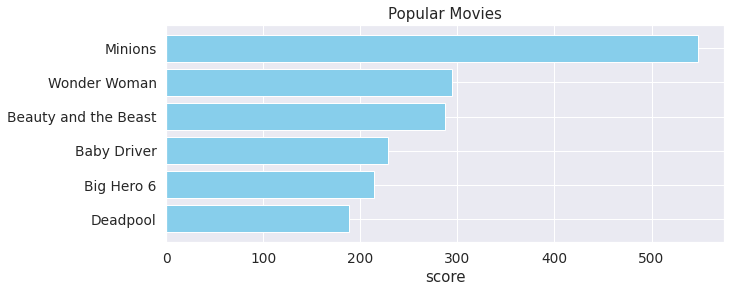

In [17]:
p_pop=df.sort_values('popularity',ascending=False)

plt.figure(figsize=(10,4))

plt.barh(p_pop['title'].head(6),p_pop['popularity'].head(6), align='center',
        color='skyblue')
plt.xlabel("score")
plt.title("Popular Movies")
plt.gca().invert_yaxis()

In [18]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [19]:
df[['title', 'vote_count']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count
15480,Inception,14075.0
12481,The Dark Knight,12269.0
14551,Avatar,12114.0
17818,The Avengers,12000.0
26564,Deadpool,11444.0
22879,Interstellar,11187.0
20051,Django Unchained,10297.0
23753,Guardians of the Galaxy,10014.0
2843,Fight Club,9678.0
18244,The Hunger Games,9634.0


In [20]:
We have create simple recommenders. This model was very baseline and only provides a fundamental framework to start with.
Please end with your valuable feedback and suggestions.


SyntaxError: invalid syntax (<ipython-input-20-2c70e83dd9fc>, line 1)